# 1 . Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.



## Importing necessary Libraries 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

## Reading the Data

In [20]:
crime_data = pd.read_csv('crime_data.csv')
crime_data

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


## Initial Investigation

In [3]:
crime_data.shape

(50, 5)

In [4]:
crime_data.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [5]:
crime_data.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

In [22]:
crime_data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [23]:
crime_data = crime_data.rename(columns={'Unnamed: 0':'State'})

In [24]:
crime_data.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


## Normalizing the function

In [6]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [7]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_fun(crime_data.iloc[:,1:])
df_norm.describe()


,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


## Creating Dendrogram

In [8]:
dendrogram = linkage(df_norm , method='complete', metric='euclidean')


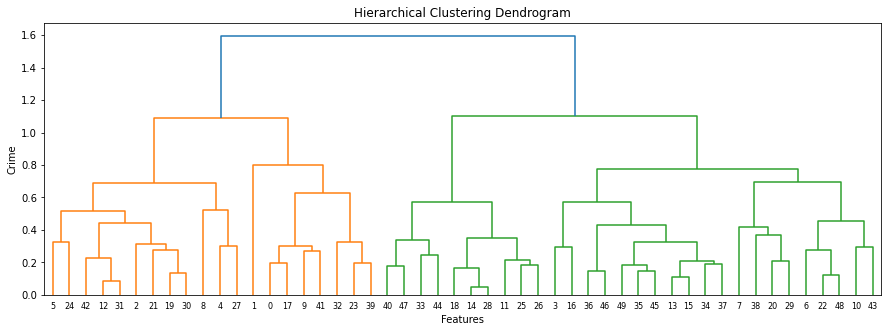

In [9]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Crime')
sch.dendrogram(dendrogram,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="complete").fit(df_norm)
clusters_label = pd.Series(model.labels_)
crime_data["Clusters"] = clusters_labels

crime_data=crime_data.iloc[:,[5,0,1,2,3,4]]
crime_data.iloc[:,2:].groupby(crime_data.Clusters).median()



,Murder,Assault,UrbanPop
Clusters,,,
0,13.80,254.0,53.0
1,5.95,132.5,70.0
2,2.40,82.0,52.0
3,11.20,254.5,80.0
